In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# Load Dataset
df = pd.read_csv(
    "../data/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv"
)

In [3]:
# Display Basic Info
print("Info\n",df.info())
print("Describe\n",df.describe())
print("Head\n",df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288602 entries, 0 to 288601
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             288602 non-null  int64  
 1    Flow Duration                288602 non-null  int64  
 2    Total Fwd Packets            288602 non-null  int64  
 3    Total Backward Packets       288602 non-null  int64  
 4   Total Length of Fwd Packets   288602 non-null  int64  
 5    Total Length of Bwd Packets  288602 non-null  int64  
 6    Fwd Packet Length Max        288602 non-null  int64  
 7    Fwd Packet Length Min        288602 non-null  int64  
 8    Fwd Packet Length Mean       288602 non-null  float64
 9    Fwd Packet Length Std        288602 non-null  float64
 10  Bwd Packet Length Max         288602 non-null  int64  
 11   Bwd Packet Length Min        288602 non-null  int64  
 12   Bwd Packet Length Mean       288602 non-nul

c:\Users\KIIT\Desktop\intrusion-detection\env\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\KIIT\Desktop\intrusion-detection\env\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


Describe
         Destination Port   Flow Duration   Total Fwd Packets  \
count      288602.000000    2.886020e+05       288602.000000   
mean         8192.051115    8.974451e+06            6.229749   
std         17516.899862    2.753682e+07           74.587817   
min             0.000000   -2.000000e+00            1.000000   
25%            53.000000    5.900000e+01            2.000000   
50%           443.000000    3.070000e+02            2.000000   
75%          3211.000000    1.005508e+05            3.000000   
max         65533.000000    1.199999e+08        22673.000000   

        Total Backward Packets  Total Length of Fwd Packets  \
count            288602.000000                 2.886020e+05   
mean                  6.221596                 5.662162e+02   
std                 111.399547                 2.605350e+04   
min                   0.000000                 0.000000e+00   
25%                   1.000000                 4.000000e+00   
50%                   2.000000     

In [4]:
print("Column\n",df.columns)
print("Shape\n",df.shape)        # (rows,columns)

Column
 Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Vari

In [5]:
df.drop_duplicates(inplace=True)
# Remove all NaN values
df = df.dropna()

In [6]:
# check for infinity values
print("Infinity values\n",df.isin([float('inf'), -float('inf')]).sum().tolist())
# remove infinity values rows
df = df[~df.isin([float('inf'), -float('inf')]).any(axis=1)]
# check for infinity values
print("Infinity values\n",df.isin([float('inf'), -float('inf')]).sum().tolist())

Infinity values
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 167, 167, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Infinity values
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [7]:
# check for missing values & duplicates
print("Missing Values\n",df.isnull().sum().tolist())
print("Duplicates\n",df.duplicated().sum().tolist())

Missing Values
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Duplicates
 0


In [8]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col] = pd.to_numeric(df[col], downcast='float')  # Convert to smaller float type

print(df.info())  # Check reduced memory usage

<class 'pandas.core.frame.DataFrame'>
Index: 252790 entries, 0 to 288601
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             252790 non-null  float32
 1    Flow Duration                252790 non-null  float64
 2    Total Fwd Packets            252790 non-null  float32
 3    Total Backward Packets       252790 non-null  float32
 4   Total Length of Fwd Packets   252790 non-null  float32
 5    Total Length of Bwd Packets  252790 non-null  float32
 6    Fwd Packet Length Max        252790 non-null  float32
 7    Fwd Packet Length Min        252790 non-null  float32
 8    Fwd Packet Length Mean       252790 non-null  float32
 9    Fwd Packet Length Std        252790 non-null  float32
 10  Bwd Packet Length Max         252790 non-null  float32
 11   Bwd Packet Length Min        252790 non-null  float32
 12   Bwd Packet Length Mean       252790 non-null  fl

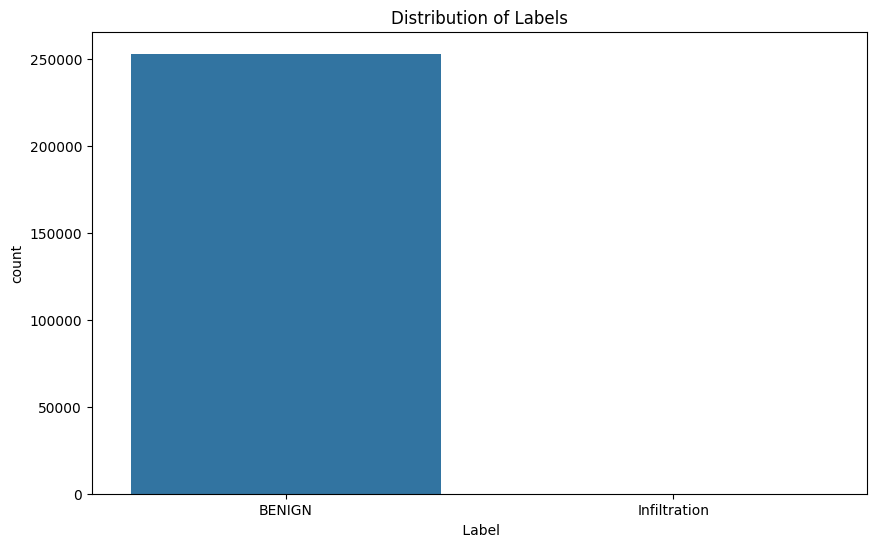

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize data distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=' Label', data=df)  # Note the space before 'Label'
plt.title('Distribution of Labels')
plt.show()

In [10]:
# rename attack labels
df[' Label'] = df[' Label'].replace({
    'BENIGN': 0,
    'Infiltration': 1
})

C:\Users\KIIT\AppData\Local\Temp\ipykernel_900\1969012868.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[' Label'] = df[' Label'].replace({


In [11]:
df[' Label'].unique()

array([0, 1])

In [12]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


scaler = MinMaxScaler()                  # Min Max Normalization
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


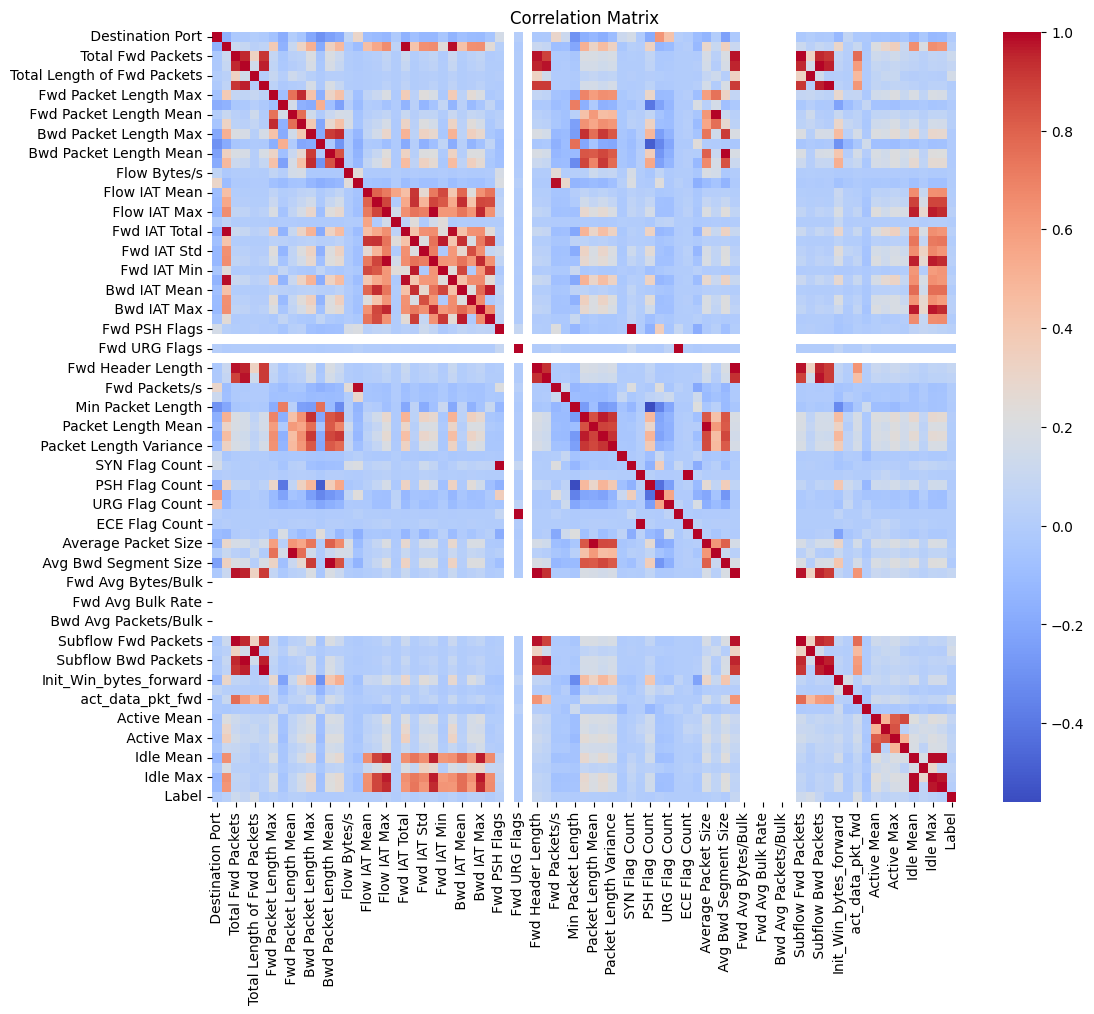

In [13]:
# Visualize correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
scaler=StandardScaler()
df_standardized=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [ ]:
pca = PCA(n_components=2)
df_pca=pca.fit_transform(df_standardized)

# Create a DataFrame with PCA results
df_pca_df = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])
print(df_pca_df.head())

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca_df['PC1'], y=df_pca_df['PC2'])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Result")
plt.show()

In [ ]:
# Assume the last column is the target variable
x= df.iloc[:, :-1]
y= df.iloc[:, -1]

# Standardize the dataset
scaler = StandardScaler()
x_scaled=scaler.fit_transform(x)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

x_train_df=pd.DataFrame(x_train,columns=x.columns)

In [ ]:
lr=LogisticRegression()

In [ ]:
svc=SVC()

In [ ]:
rf=RandomForestClassifier()

In [ ]:
dtc=DecisionTreeClassifier()

In [ ]:
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
models={
    'Logistic Regression': lr,
    'SVM': svc,
    'Random Forest': rf,
    'Decision Tree': dtc,
    'KNN': knn
}

In [ ]:
results = {}

for name, model in models.items():
    if isinstance(model, tuple):
        model = model[0]  # Extract the model from the tuple
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1 Score": f1_score(y_test, y_pred, average="weighted"),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }